In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import gc
import psutil
import os
import argparse

from functions import *
from test_functions import *

In [72]:
# generate a grid

grid_specs, grid_1d_size = create_3d_grid(grid_counts=7, halfside = 5)

grid_points_expanded = cut_shell(inner_rad = 0, outer_rad = 15, sublayers=1, grid_specs=grid_specs)


[-5.         -3.33333333 -1.66666667  0.          1.66666667  3.33333333
  5.        ]
1d coords created
Current memory usage: 155.87 MB
meshgriding now
done
Current memory usage: 155.87 MB
don't need 1d coords anymore; delete
deleted
Current memory usage: 155.87 MB
computing distances and putting grid specs together
grid specs put together
Current memory usage: 155.87 MB
checking if deleting separate x_coords does anything
deleted
Current memory usage: 155.87 MB
Subshell 1 grid done (out of 1); limits: 0.0 , 15.0


In [73]:
enlarged_points = grid_points_expanded[0]
#print(f'enlarged_points : {enlarged_points}')
print(f'len(enlarged_points) = {len(enlarged_points)}')
print(f'len(enlarged_points) = {len(enlarged_points)}')
#for i in range(len(enlarged_points)):
#    print(f'enlarged_points[{i}]: {enlarged_points[i]}')
added_points = create_midpoints(points_array = enlarged_points, spacing_1d = grid_1d_size, acc = None )
print(f'len(added_points) = {len(added_points)}')
print(f'len(added_points) + len(enlarged_points) = {len(added_points) + len(enlarged_points)}')

#no = enlarged_points

enlarged_points = np.concatenate((enlarged_points, added_points), axis=0)
print(f'len of enlarged points after concatenation = {len(enlarged_points)}')
print(f'grid_1d_size = {grid_1d_size}')

len(enlarged_points) = 342
len(enlarged_points) = 342
outside of loop! converting to array
len(added_points) = 1848
len(added_points) + len(enlarged_points) = 2190
len of enlarged points after concatenation = 2190
grid_1d_size = 1.666666666666667


In [74]:
#print(f'enlarged_points = {enlarged_points}')

enlarged_points = trim_shell(inner_rad=4, outer_rad=5,  points_array=enlarged_points)
print(f'len(enlarged_points) = {len(enlarged_points)}')
#for i in range(len(enlarged_points)):
 #   print(f'enlarged_points[{i}]: {enlarged_points[i]}')

len of initial array: 2190
len of trimmed array: 458
len(enlarged_points) = 458


#enlarged_points[0]: [ 0. -2.  0.]
#enlarged_points[1]: [-1. -1. -1.]
#enlarged_points[2]: [-1. -1.  0.]
#enlarged_points[3]: [-1. -1.  1.]
#enlarged_points[4]: [ 0. -1. -1.]
#enlarged_points[5]: [ 0. -1.  1.]
#enlarged_points[6]: [ 1. -1. -1.]
#enlarged_points[7]: [ 1. -1.  0.]
#enlarged_points[8]: [ 1. -1.  1.]
#enlarged_points[9]: [-2.  0.  0.]
#enlarged_points[10]: [-1.  0. -1.]
#enlarged_points[11]: [-1.  0.  1.]
#enlarged_points[12]: [ 0.  0. -2.]
#enlarged_points[13]: [0. 0. 2.]
enlarged_points[14]: [ 1.  0. -1.]
enlarged_points[15]: [1. 0. 1.]
#enlarged_points[16]: [2. 0. 0.]
enlarged_points[17]: [-1.  1. -1.]
enlarged_points[18]: [-1.  1.  0.]
enlarged_points[19]: [-1.  1.  1.]
enlarged_points[20]: [ 0.  1. -1.]
enlarged_points[21]: [0. 1. 1.]
enlarged_points[22]: [ 1.  1. -1.]
enlarged_points[23]: [1. 1. 0.]
enlarged_points[24]: [1. 1. 1.]
#enlarged_points[25]: [0. 2. 0.]

#enlarged_points[0]: [ 0. -2.  0.]
#enlarged_points[1]: [-2.  0.  0.]
#enlarged_points[2]: [ 0.  0. -2.]
#enlarged_points[3]: [0. 0. 2.]
#enlarged_points[4]: [2. 0. 0.]
#enlarged_points[5]: [0. 2. 0.]
enlarged_points[6]: [-2.  0.  0.]
#enlarged_points[7]: [-1.  0. -1.]
#enlarged_points[8]: [-1.  0.  1.]
#enlarged_points[9]: [-1. -1. -1.]
#enlarged_points[10]: [-1. -1.  1.]
enlarged_points[11]: [ 0. -2.  0.]
#enlarged_points[12]: [ 0. -1.  1.]
#enlarged_points[13]: [ 0. -1. -1.]
#enlarged_points[14]: [-1. -1.  0.]
enlarged_points[15]: [ 0.  0. -2.]
enlarged_points[16]: [ 1.  0. -1.]
#enlarged_points[17]: [ 1. -1.  0.]
#enlarged_points[18]: [ 1. -1. -1.]
#enlarged_points[19]: [ 1. -1.  1.]
enlarged_points[20]: [0. 0. 2.]
enlarged_points[21]: [1. 0. 1.]
enlarged_points[22]: [2. 0. 0.]
enlarged_points[23]: [-1.  1. -1.]
enlarged_points[24]: [-1.  1.  0.]
enlarged_points[25]: [ 0.  1. -1.]
enlarged_points[26]: [-1.  1.  1.]
enlarged_points[27]: [0. 1. 1.]
enlarged_points[28]: [ 1.  1. -1.]
enlarged_points[29]: [1. 1. 1.]
enlarged_points[30]: [1. 1. 0.]
enlarged_points[31]: [0. 2. 0.]

In [51]:
yes = enlarged_points

In [56]:
# Check for duplicates in `yes`
yes_set = {tuple(x) for x in yes}  # Convert each row to a tuple
duplicates = len(yes) != len(yes_set)

if duplicates:
    print("Duplicates found in 'yes'.")
else:
    print("No duplicates in 'yes'.")



No duplicates in 'yes'.


In [58]:
# Convert both `yes` and `no` to sets of tuples for accurate comparison
yes_set = {tuple(x) for x in yes}
no_set = {tuple(x) for x in no}

# Find elements in `yes_set` that are not in `no_set`
unique_in_yes = yes_set - no_set

if unique_in_yes:
    #print("Elements in 'yes' not in 'no':", list(unique_in_yes))
    print('there are some unique points in yes.')
else:
    print("All elements in 'yes' are also in 'no'.")
    
print(len(unique_in_yes))

there are some unique points in yes.
560


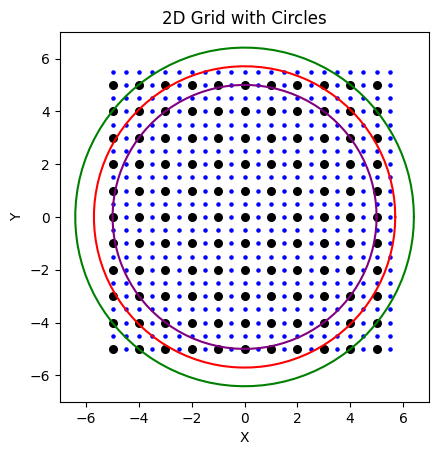

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D grid with integer points from -5 to 5
x = np.arange(-5, 6, 1)
y = np.arange(-5, 6, 1)
X, Y = np.meshgrid(x, y)

# Generate second 2D grid with half unit spacing (1/2)
x_half = np.arange(-5, 6, 0.5)
y_half = np.arange(-5, 6, 0.5)
X_half, Y_half = np.meshgrid(x_half, y_half)

# Define the radii of the circles
radius1 = 5 + np.sqrt(2)/2
radius2 = 5 + np.sqrt(2)
radius3 = 5  # New circle with radius 5

# Create the figure and axis
fig, ax = plt.subplots()
# Plot the second grid points (scatter) in pink with smaller size
ax.scatter(X_half, Y_half, color='blue', label='Smaller grid points', s=5)
# Plot the first grid points (scatter) in blue
ax.scatter(X, Y, color='black', label='Grid points', s=30)  # s is the marker size



# Plot the circles using parametric equations
theta = np.linspace(0, 2 * np.pi, 100)
circle1_x = radius1 * np.cos(theta)
circle1_y = radius1 * np.sin(theta)
circle2_x = radius2 * np.cos(theta)
circle2_y = radius2 * np.sin(theta)
circle3_x = radius3 * np.cos(theta)  # New circle X coordinates
circle3_y = radius3 * np.sin(theta)  # New circle Y coordinates

# Plot the circles with different colors
ax.plot(circle1_x, circle1_y, color='red', label=f'Circle with radius {radius1}')
ax.plot(circle2_x, circle2_y, color='green', label=f'Circle with radius {radius2}')
ax.plot(circle3_x, circle3_y, color='purple', label=f'Circle with radius {radius3}')  # New circle

# Set equal scaling, labels, and title
ax.set_aspect('equal')
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Grid with Circles')

# Add legend
#ax.legend()
plt.savefig('circle.pdf', format = 'pdf')

# Show the plot
plt.show()

In [1]:
import numpy as np

def integer_decompositions(target):
    target_sq = target ** 2
    solutions = []

    # Iterate over possible x, y, z values
    for x in range(int(np.sqrt(target_sq)) + 1):  # x ranges from 0 to sqrt(target_sq)
        print(f'Checking for x = {x}')
        for y in range(0, int(np.sqrt(target_sq - x**2)) + 1):  # y starts from 0
            for z in range(0, int(np.sqrt(target_sq - x**2 - y**2)) + 1):  # z starts from 0
                if x**2 + y**2 + z**2 == target_sq:
                    solutions.append((x, y, z))

    return solutions

# Compute decompositions for 6371
target = 6371
decompositions = integer_decompositions(target)

# Print the results
print(f"\nAll integer decompositions of {target}^2 = x^2 + y^2 + z^2:")
for x, y, z in decompositions:
    print(f"x = {x}, y = {y}, z = {z}")

# Print total number of triplets
print(f"\nTotal number of triplets found: {len(decompositions)}")

Checking for x = 0
Checking for x = 1
Checking for x = 2
Checking for x = 3
Checking for x = 4


KeyboardInterrupt: 

In [ ]:
import numpy as np

def fractional_integer_decompositions(target):
    target_sq = target ** 2
    solutions = []

    # Iterate over possible x, y, z values
    max_value = int(np.sqrt(target_sq))  # Max integer value x, y, z can take
    for x in range(-max_value, max_value + 1):  # x ranges from -max_value to max_value
        for y in range(-max_value, max_value + 1):  # y ranges similarly
            for z in range(-max_value, max_value + 1):  # z ranges similarly
                # Compute the sum of squares for shifted coordinates
                sum_of_squares = ((x + 0.5) ** 2 + (y + 0.5) ** 2 + (z + 0.5) ** 2)
                # Check if it equals the target squared
                if np.isclose(sum_of_squares, target_sq):
                    solutions.append((x, y, z))

    return solutions

# Compute decompositions for 6371
target = 6371
decompositions = fractional_integer_decompositions(target)

# Print the results
print(f"\nAll fractional integer decompositions of {target}^2 = (x + 1/2)^2 + (y + 1/2)^2 + (z + 1/2)^2:")
for x, y, z in decompositions:
    print(f"x = {x}, y = {y}, z = {z}")

# Print total number of triplets
print(f"\nTotal number of triplets found: {len(decompositions)}")

In [ ]:
import numpy as np

def fractional_integer_decompositions_optimized(target):
    target_sq = target ** 2

    # Define the range of values for x, y, z
    max_value = int(np.sqrt(target_sq))  # Max integer value for x, y, z
    values = np.arange(-max_value, max_value + 1)

    # Generate all combinations of x, y, z in a vectorized way
    X, Y, Z = np.meshgrid(values, values, values, indexing='ij')

    # Compute the sum of squares for shifted coordinates
    sum_of_squares = (X + 0.5)**2 + (Y + 0.5)**2 + (Z + 0.5)**2

    # Create a mask to find valid decompositions
    mask = np.isclose(sum_of_squares, target_sq)

    # Extract the valid x, y, z values
    x_valid = X[mask]
    y_valid = Y[mask]
    z_valid = Z[mask]

    # Combine the results into a list of triplets
    solutions = list(zip(x_valid, y_valid, z_valid))
    return solutions

# Compute decompositions for 6371
target = 793
decompositions = fractional_integer_decompositions_optimized(target)

# Print the results
print(f"\nAll fractional integer decompositions of {target}^2 = (x + 1/2)^2 + (y + 1/2)^2 + (z + 1/2)^2:")
for x, y, z in decompositions:
    print(f"x = {x}, y = {y}, z = {z}")

# Print total number of triplets
print(f"\nTotal number of triplets found: {len(decompositions)}")